
## HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.
 

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Renaming and Calling the dataset as dataframe

In [2]:
df=pd.read_csv('hr_data.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Checking the dataframe shape

In [3]:
df.shape

(1470, 35)

- The dataframe have 1470 number of rows and 35 number of columns.

#### Checking the data-types involved in the columns of the dataframe 

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

### Checking for null- values

In [5]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- There is no null-value in the dtatframe.

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.loc[df['Attrition']==" "]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


- There are no space or null-values in any form in the dataset.

### Columns names involved in the dataframe

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Making Nominal data for Visualisation

In [9]:
df_visualisation_nominal=df[['Attrition', 'BusinessTravel', 'Department',
       'Education','EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].copy()

In [10]:
df_visualisation_nominal.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
import seaborn as sns

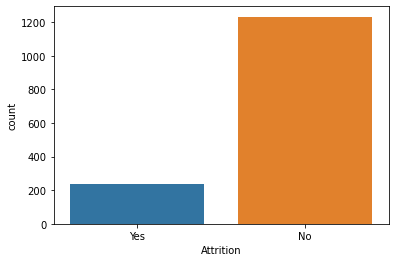

In [12]:
ax=sns.countplot(x='Attrition',data=df_visualisation_nominal)

- The 'Attrition' column is our target variable , which is a classification problem.
- The no of Attrition is comparatively low with that of people still working with the same organisation.
- This dataset gives us the inputs about factors that affect and make people leave the organisation.

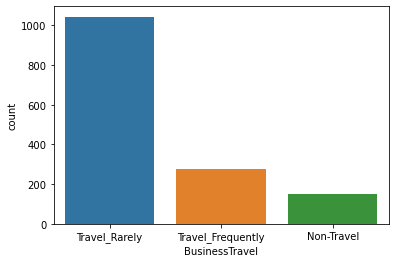

In [13]:
ax=sns.countplot(x='BusinessTravel',data=df_visualisation_nominal)

- The graph indicates that more people travel rarely while some completly are non-travellors.

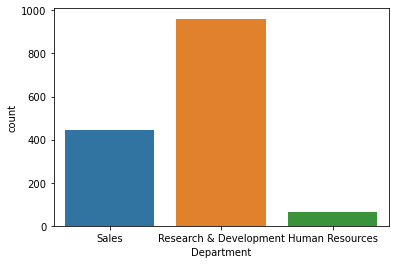

In [14]:
ax=sns.countplot(x='Department',data=df_visualisation_nominal)

- The graph shows that people working in the research & development is the highest in the organisation.
- The department of sales has more people than Hr.

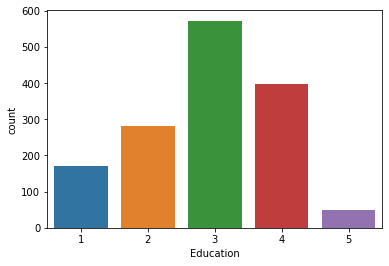

In [15]:
ax=sns.countplot(x='Education',data=df_visualisation_nominal)

- Most of the employees are multi education qualification holders.

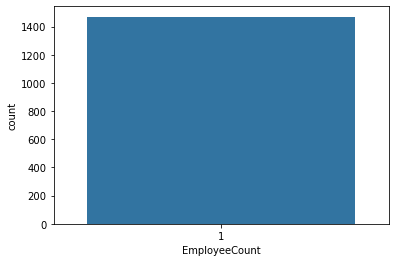

In [16]:
ax=sns.countplot(x='EmployeeCount',data=df_visualisation_nominal)

- It was an indicative column in the dataframe about the particular informations belonging to an individual employee only.

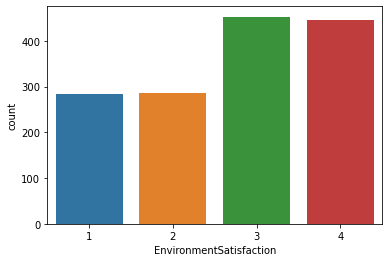

In [17]:
ax=sns.countplot(x='EnvironmentSatisfaction',data=df_visualisation_nominal)

- The graph indicates the ratings given by employees about their level of Satisfaction in the work environment.
- With these the hr can understand how much of people are not satisfied which may move to attrition.

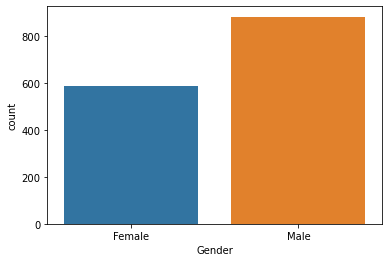

In [18]:
ax=sns.countplot(x='Gender',data=df_visualisation_nominal)

- The graph shows Male employee number is higher than that of females.

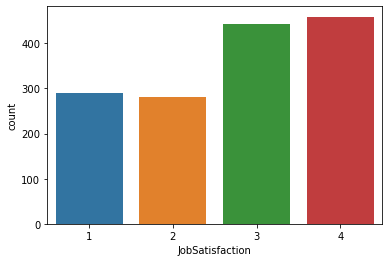

In [19]:
ax=sns.countplot(x='JobSatisfaction',data=df_visualisation_nominal)

- The graph indicates the ratings given by employees about their level of Satisfaction in the work assigned to them.
- With these the hr can understand how much of people are not satisfied which may move to attrition.

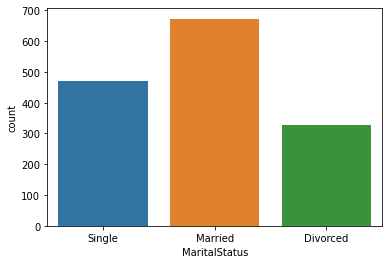

In [20]:
ax=sns.countplot(x='MaritalStatus',data=df_visualisation_nominal)

- There are more married people working in the company than singles or divorced.

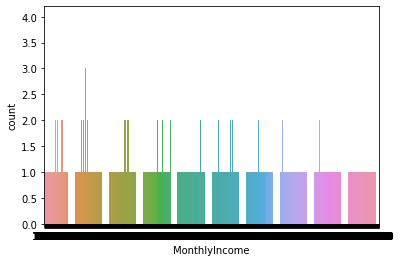

In [21]:
ax=sns.countplot(x='MonthlyIncome',data=df_visualisation_nominal)

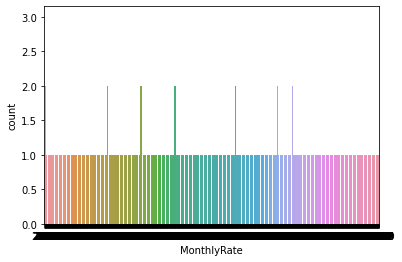

In [22]:
ax=sns.countplot(x='MonthlyRate',data=df_visualisation_nominal)

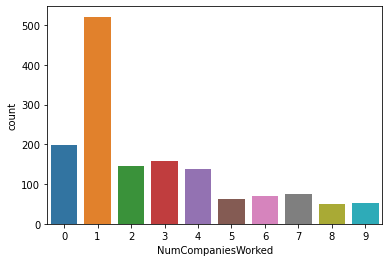

In [23]:
ax=sns.countplot(x='NumCompaniesWorked',data=df_visualisation_nominal)

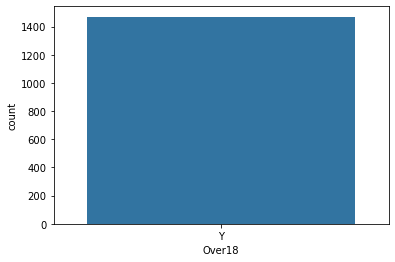

In [24]:
ax=sns.countplot(x='Over18',data=df_visualisation_nominal)

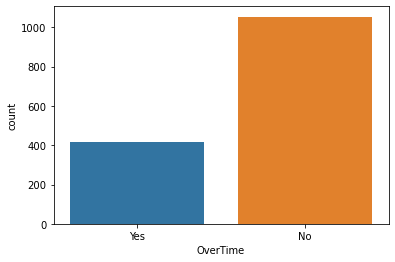

In [25]:
ax=sns.countplot(x='OverTime',data=df_visualisation_nominal)

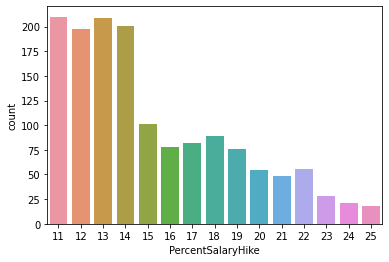

In [26]:
ax=sns.countplot(x='PercentSalaryHike',data=df_visualisation_nominal)

- It shows the amount of people got salary hike's which affects attrtion highly.

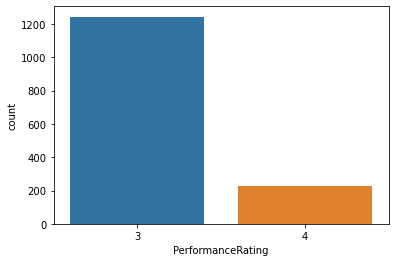

In [27]:
ax=sns.countplot(x='PerformanceRating',data=df_visualisation_nominal)

- People with good performace score might move to attrition

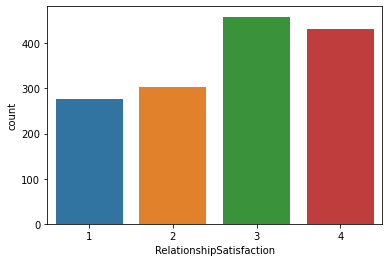

In [28]:
ax=sns.countplot(x='RelationshipSatisfaction',data=df_visualisation_nominal)

- The graph indicates the ratings given by employees about their level of Satisfaction in the bondings with colleagues.
- With these the hr can understand how much of people are not satisfied which may move to attrition.

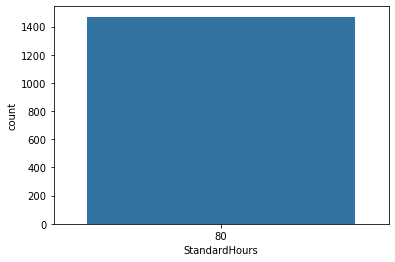

In [29]:
ax=sns.countplot(x='StandardHours',data=df_visualisation_nominal)

- Same working hours for all

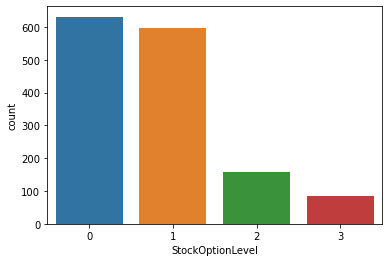

In [30]:
ax=sns.countplot(x='StockOptionLevel',data=df_visualisation_nominal)

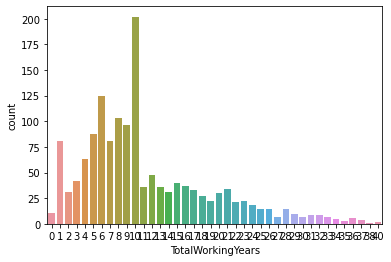

In [31]:
ax=sns.countplot(x='TotalWorkingYears',data=df_visualisation_nominal)

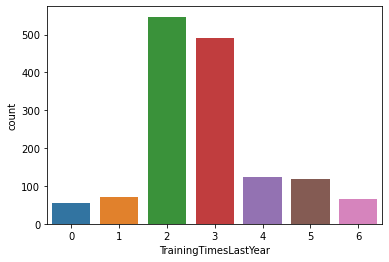

In [32]:
ax=sns.countplot(x='TrainingTimesLastYear',data=df_visualisation_nominal)

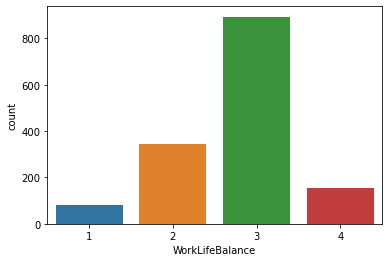

In [33]:
ax=sns.countplot(x='WorkLifeBalance',data=df_visualisation_nominal)

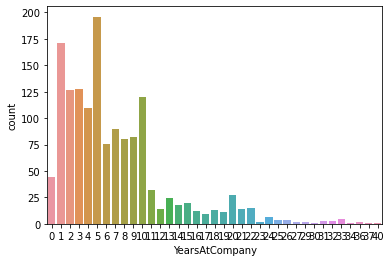

In [34]:
ax=sns.countplot(x='YearsAtCompany',data=df_visualisation_nominal)

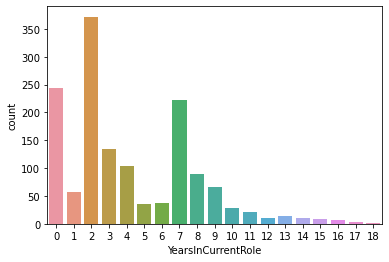

In [35]:
ax=sns.countplot(x='YearsInCurrentRole',data=df_visualisation_nominal)

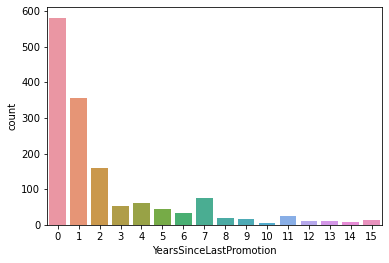

In [36]:
ax=sns.countplot(x='YearsSinceLastPromotion',data=df_visualisation_nominal)

- It shows that very low no of people have choosed to stay after the promotion.

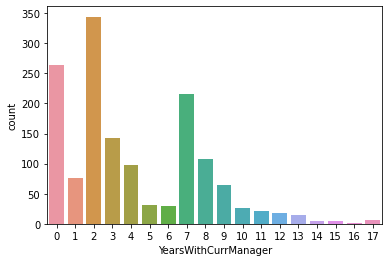

In [37]:
ax=sns.countplot(x='YearsWithCurrManager',data=df_visualisation_nominal)

- The graph indicates that more people are stable with the current manager.

### Making dataframe for the continous data

In [38]:
df_visualisation_continous=df[['Age','DailyRate','DistanceFromHome','Education',]]
df_visualisation_continous

,Age,DailyRate,DistanceFromHome,Education
0,41,1102,1,2
1,49,279,8,1
2,37,1373,2,2
3,33,1392,3,4
4,27,591,2,1
...,...,...,...,...
1465,36,884,23,2
1466,39,613,6,1
1467,27,155,4,3
1468,49,1023,2,3


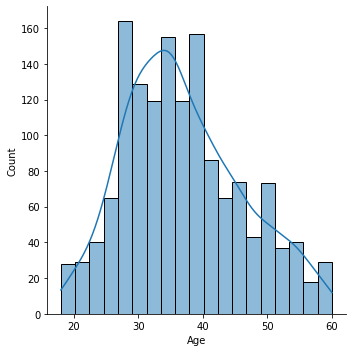

In [39]:
sns.displot(df_visualisation_continous['Age'],kde=True)

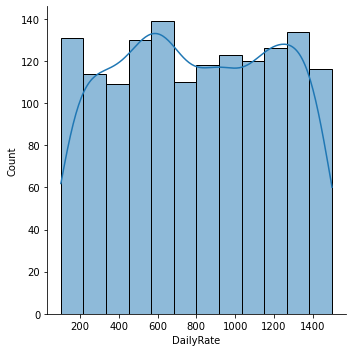

In [40]:
sns.displot(df_visualisation_continous['DailyRate'],kde=True)

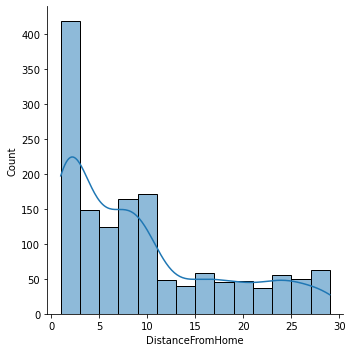

In [41]:
sns.displot(df_visualisation_continous['DistanceFromHome'],kde=True)

## Encoding the Dataframe :

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [43]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [44]:
le=preprocessing.LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df['Over18']=le.fit_transform(df['Over18'])
df['OverTime']=le.fit_transform(df['OverTime'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Description of the dataframe


In [45]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


 The dataframe description gives -
- The total count of values in each columns i.e 35 .
- The mean and standard deviation values of each columns.
- The quartile values for 25the , 50th and 75th persentiles.
- The maximum values for each columns as well.

<AxesSubplot:>

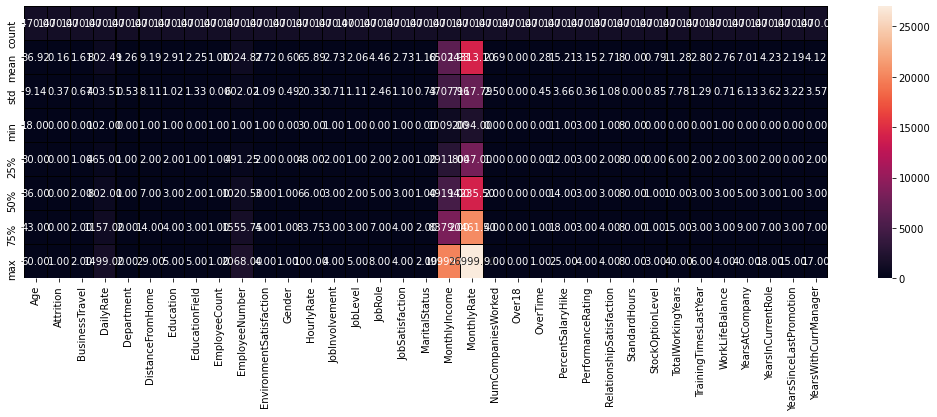

In [46]:
plt.figure(figsize=(18,5))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

## Correlation of the columns with the target variables :-

In [47]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

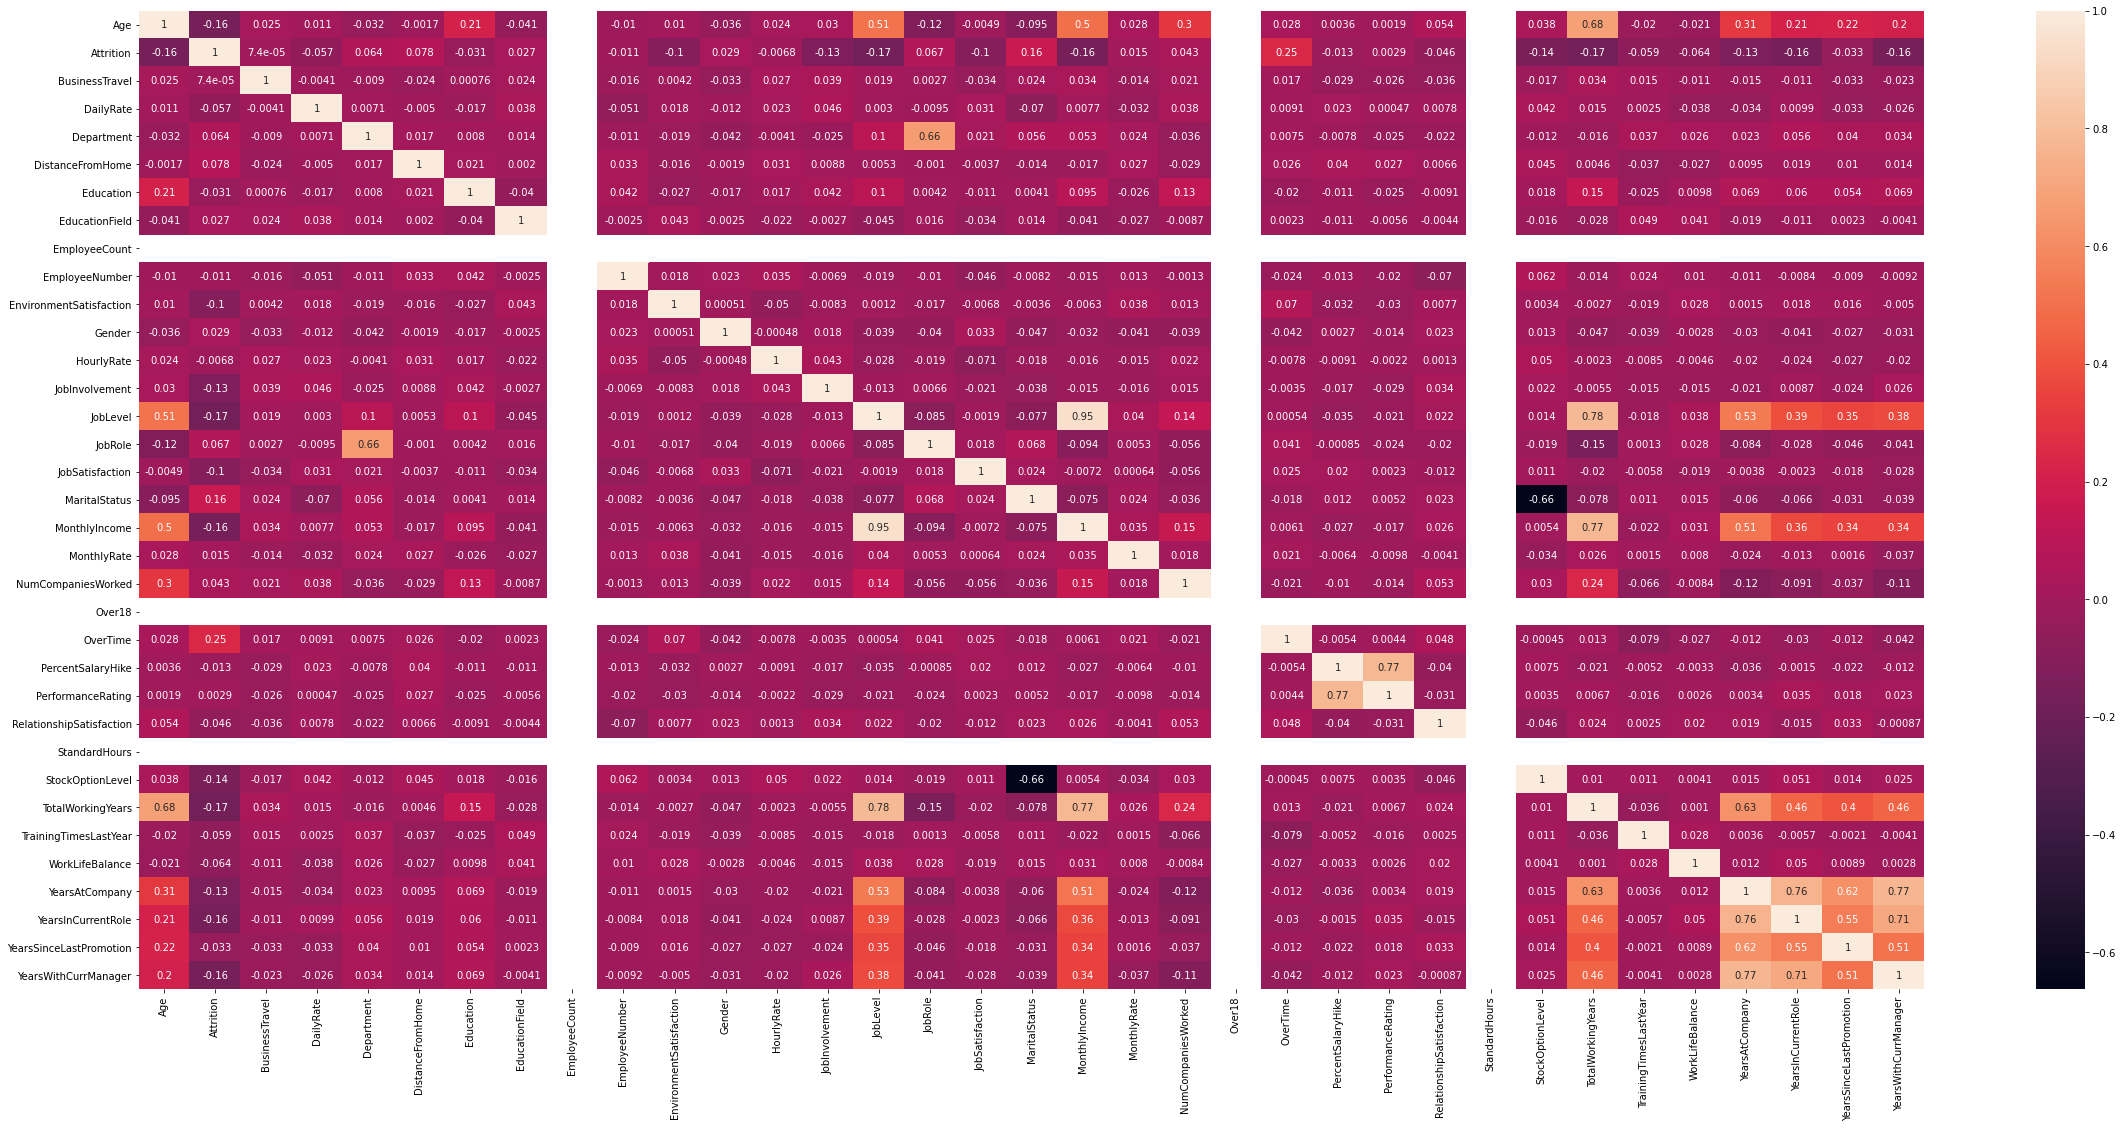

In [48]:
plt.figure(figsize=(40,18))
sns.heatmap(df.corr(),annot=True)

### Checking the columns which are positivly or negatively related to target variable :-


- The negative correlation of the dependent variables with target variable affects it in inversly proportional manner.
- for positive correlation , it affects directly .

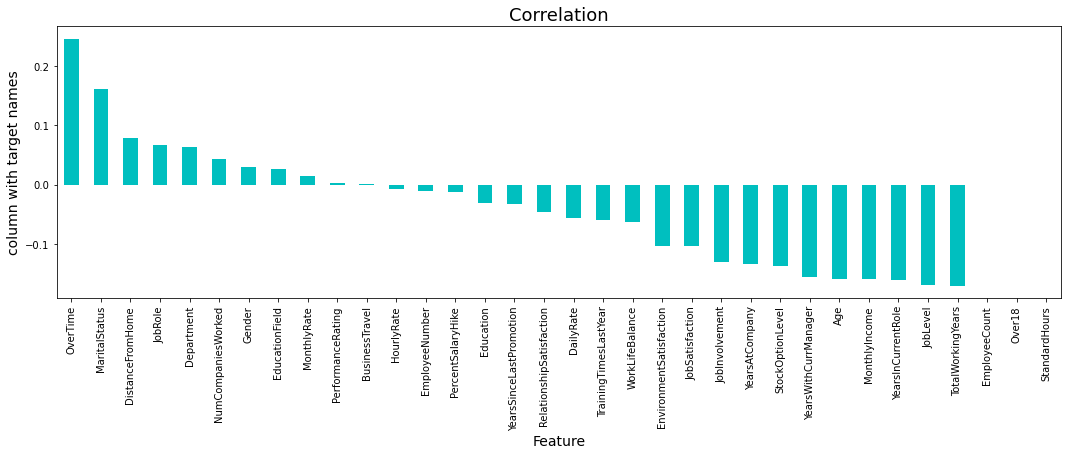

In [49]:
plt.figure(figsize=(18,5))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

- Variables above 0 are positvely related to the target variable.
- Variables below 0 are negatively related to the target variable.

### Checking the skewness

In [50]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

keeping +/- 0.5 as the range for skeness.

### Seperating the target variable from dependent variable

In [51]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [52]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [53]:
x.shape # rows --> 1470 , columns --> 34

(1470, 34)

In [54]:
y.head()  

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [55]:
y.shape # rows --> 1470

(1470,)

### Handling the skewness

In [56]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EmployeeCount               0.000000
EmployeeNumber             -0.288025
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StandardHours               0.000000
StockOptionLevel            0.087019
T

### Box-plot  graph for the variables :-


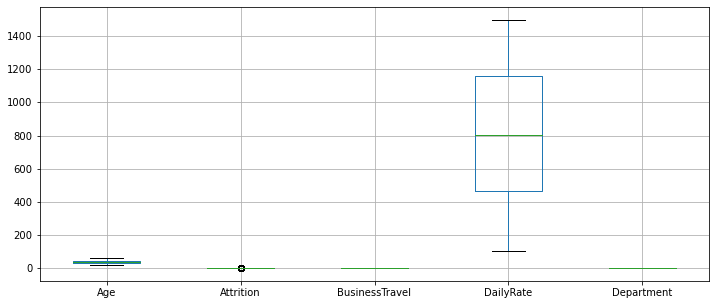

In [57]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

- Rare presence of outliers can be observed.

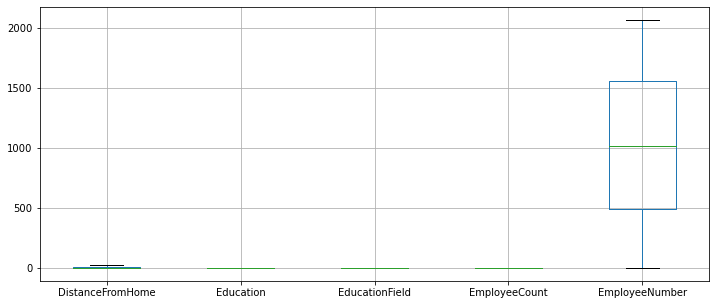

In [58]:
# plotting boxplots for first 5 columns
df.iloc[:,5:10].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

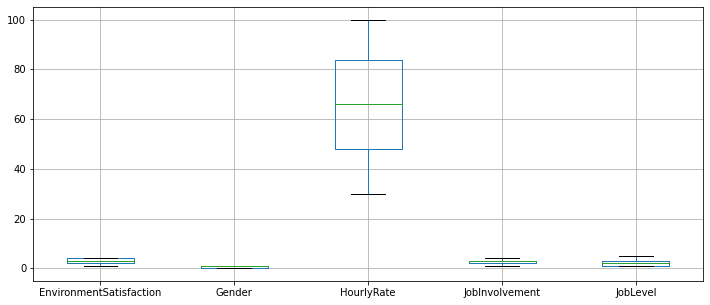

In [59]:
# plotting boxplots for first 5 columns
df.iloc[:,10:15].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

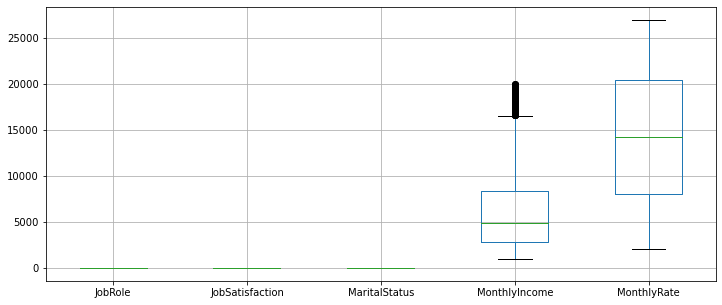

In [60]:
# plotting boxplots for first 5 columns
df.iloc[:,15:20].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

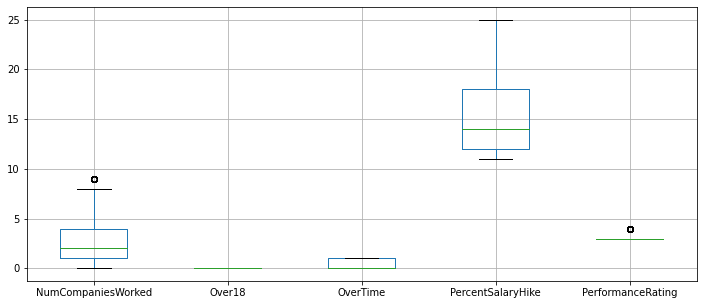

In [61]:
# plotting boxplots for first 5 columns
df.iloc[:,20:25].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

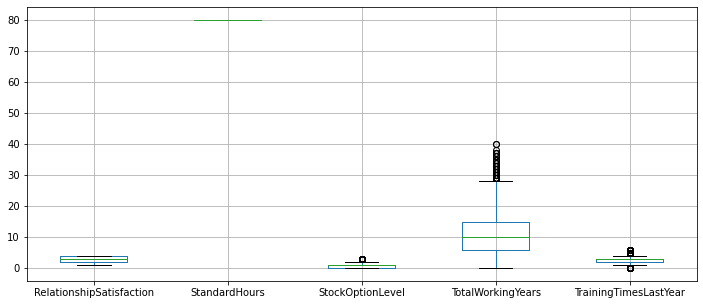

In [62]:
# plotting boxplots for first 5 columns
df.iloc[:,25:30].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

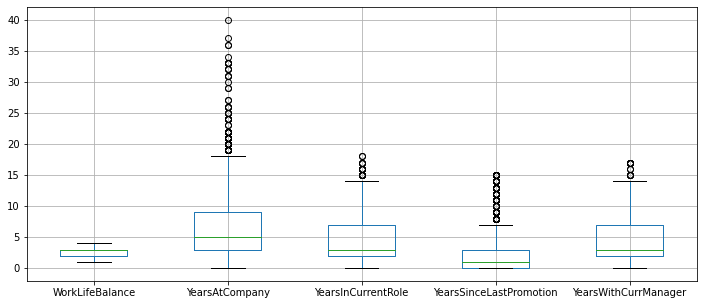

In [63]:
# plotting boxplots for first 5 columns
df.iloc[:,30:36].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

- Rare presence of outliers can be observed.

In [64]:
df.shape # rows--> 1470 , columns--> 35

(1470, 35)

### Handling the outliers :-

In [65]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence



In [66]:
df # improved dataframe

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,4,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [67]:
df.shape # rows--> 1470 , columns--> 35

(1470, 35)

- There is no data loss while handling the outliers.

### Seperating variables as X and Y for training & testing

In [68]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [69]:
x.shape  # rows--> 1470 , columns--> 35

(1470, 34)

### Scaling 

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
mms=MinMaxScaler()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=12)

### Naive Bayes Classifeir Model testing -

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [73]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predictionmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predictionmnb))
print(confusion_matrix(y_test,predictionmnb))
print(classification_report(y_test,predictionmnb))

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [74]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predictiongnb=gnb.predict(x_test)
print(accuracy_score(y_test,predictiongnb))
print(confusion_matrix(y_test,predictiongnb))
print(classification_report(y_test,predictiongnb))

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



## Decision Tree Classifier model testing -

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_test,y_test)
predictiondtc=dtc.predict(x_test)
print(accuracy_score(y_test,predictiondtc))
print(confusion_matrix(y_test,predictiondtc))
print(classification_report(y_test,predictiondtc))

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



## Nearest Neighbors Classifier model testing -

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predictionknn=knn.predict(x_test)
print(accuracy_score(y_test,predictionknn))
print(confusion_matrix(y_test,predictionknn))
print(classification_report(y_test,predictionknn))

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [77]:
def kneighbors(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predictionknn=knn.predict(x_test)
    print(accuracy_score(y_test,predictionknn))
    print(confusion_matrix(y_test,predictionknn))
    print(classification_report(y_test,predictionknn))

In [78]:
kneighbors(3)

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [79]:
kneighbors(4)

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [80]:
kneighbors(5)

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



In [81]:
kneighbors(6)

1.0
[[324]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       324

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324



## Finding out the Cross Validation Score for each model tested



In [82]:
from sklearn.model_selection import cross_val_score

### MultinomialNB Model

In [83]:
cvs=cross_val_score(mnb,x,y,cv=5)
print('The cross validation score for MultinomialNB model is :',cvs.mean(),'.')
print('The difference between accuracy and crossvalidation score is : 0 .')

The cross validation score for MultinomialNB model is : 1.0 .
The difference between accuracy and crossvalidation score is : 0 .


### GaussianNB Model

In [84]:
cvs=cross_val_score(gnb,x,y,cv=5)
print('The cross validation score for GaussianNB model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.')

The cross validation score for GaussianNB model is : 1.0
The difference between accuracy and crossvalidation score is : 0.


### Nearest Neighbor Model

In [85]:
cvs=cross_val_score(knn,x,y,cv=5)
print('The cross validation score for NearestNeighbor model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.')

The cross validation score for NearestNeighbor model is : 1.0
The difference between accuracy and crossvalidation score is : 0.


### Decision Tree Classifier model

In [86]:
cvs=cross_val_score(dtc,x,y,cv=5)
print('The cross validation score for DecisionTreeClassifier model is :',cvs.mean())
print('The difference between accuracy and crossvalidation score is : 0.')

The cross validation score for DecisionTreeClassifier model is : 1.0
The difference between accuracy and crossvalidation score is : 0.


- All the models are working with great efficiency , hence , we can choose any model randomly.

## Saving the best model

In [87]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(knn,open('pickledtcfile','wb'))

In [88]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,